# Data wrangling<a id='1_Data_wrangling'></a>

## Imports<a id='1.1_Imports'></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Joining Data<a id='1.2_Joining Data'></a>

In [5]:
# Specify the directory containing the CSV files
csv_directory = "C:/Users/harry/Springboard/Capstone 2/data"

# Define the main file and initialize the base dataframe
main_file = "ripa_stops_historic.csv"
main_df = pd.read_csv(os.path.join(csv_directory, main_file))

# Loop through all other CSV files and merge them with the main file
for file in os.listdir(csv_directory):
    if file.endswith(".csv") and file != main_file:
        # Read the current CSV file
        current_df = pd.read_csv(os.path.join(csv_directory, file))

        # Drop duplicate uids in the merging dataset
        current_df = current_df.drop_duplicates(subset="uid")

        # Rename columns (except 'uid') to avoid conflicts
        current_df = current_df.rename(
            columns={col: f"{file.split('.')[0]}_{col}" for col in current_df.columns if col != "uid"}
        )

        # Merge the current dataframe with the main dataframe on 'uid'
        main_df = pd.merge(main_df, current_df, on="uid", how="left")

# Save the merged dataframe to a new CSV file
output_file = os.path.join(csv_directory, "merged_ripa_dataset.csv")
main_df.to_csv(output_file, index=False)

print(f"Merged dataset saved to: {output_file}")

C:\Users\harry\AppData\Local\Temp\ipykernel_45804\4137610685.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv(os.path.join(csv_directory, main_file))
C:\Users\harry\AppData\Local\Temp\ipykernel_45804\4137610685.py:12: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  current_df = pd.read_csv(os.path.join(csv_directory, file))


Merged dataset saved to: C:/Users/harry/Springboard/Capstone 2/data\merged_ripa_dataset.csv


# Data Cleaning and Preparation
This section focuses on preparing the dataset for analysis by:
- Handling missing data.
- Cleaning and standardizing categorical variables.
- Removing or transforming redundant, irrelevant, or inconsistent coluysis.


In [7]:
main_df.columns

Index(['uid', 'stop_id', 'ori', 'agency', 'exp_years', 'date_stop',
       'time_stop', 'stopduration', 'stop_in_response_to_cfs',
       'officer_assignment_key', 'assignment', 'intersection', 'address_block',
       'land_mark', 'address_street', 'highway_exit', 'isschool',
       'school_name', 'address_city', 'beat', 'beat_name', 'pid', 'isstudent',
       'perceived_limited_english', 'perceived_age', 'perceived_gender',
       'gender_nonconforming', 'perceived_lgbt',
       'ripa_actions_taken_historic_stop_id',
       'ripa_actions_taken_historic_pid', 'ripa_actions_taken_historic_action',
       'ripa_actions_taken_historic_person_search_consented',
       'ripa_actions_taken_historic_property_search_consented',
       'ripa_contraband_evid_historic_stop_id',
       'ripa_contraband_evid_historic_pid',
       'ripa_contraband_evid_historic_contraband',
       'ripa_disability_historic_stop_id', 'ripa_disability_historic_pid',
       'ripa_disability_historic_disability', 'ripa_

In [8]:
# remove redundant id cols
columns_to_remove = [col for col in main_df.columns if col.startswith('ripa_') and col.endswith('_stop_id')]
main_df = main_df.drop(columns=columns_to_remove, errors='ignore')
columns_to_remove = [col for col in main_df.columns if col.startswith('ripa_') and col.endswith('_pid')]
main_df = main_df.drop(columns=columns_to_remove, errors='ignore')

In [9]:
# check if cols were removed
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755891 entries, 0 to 755890
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   uid                                                      755891 non-null  object 
 1   stop_id                                                  755891 non-null  int64  
 2   ori                                                      755891 non-null  object 
 3   agency                                                   755891 non-null  object 
 4   exp_years                                                755891 non-null  int64  
 5   date_stop                                                755891 non-null  object 
 6   time_stop                                                755891 non-null  object 
 7   stopduration                                             755891 non-null  int64  
 8   stop_in_respon

In [10]:
# Remove redundant prefixes
def clean_column_names(column_name):
    prefixes_to_remove = [
        "ripa_stop_result_historic", 
        "ripa_stop_reason_historic", 
        "ripa_race_historic", 
        "ripa_actions_taken_historic", 
        "ripa_contraband_evid_historic",
        "ripa_disability_historic",
        "ripa_prop_seize_basis_historic",
        "ripa_prop_seize_type_historic",
        "ripa_gender_historic",
        "ripa_search_basis_historic"
    ]
    for prefix in prefixes_to_remove:
        if column_name.startswith(prefix):
            return column_name.replace(prefix + "_", "")
    return column_name  

# Apply the function to the dataframe's columns
main_df.columns = [clean_column_names(col) for col in main_df.columns]

main_df.columns

Index(['uid', 'stop_id', 'ori', 'agency', 'exp_years', 'date_stop',
       'time_stop', 'stopduration', 'stop_in_response_to_cfs',
       'officer_assignment_key', 'assignment', 'intersection', 'address_block',
       'land_mark', 'address_street', 'highway_exit', 'isschool',
       'school_name', 'address_city', 'beat', 'beat_name', 'pid', 'isstudent',
       'perceived_limited_english', 'perceived_age', 'perceived_gender',
       'gender_nonconforming', 'perceived_lgbt', 'action',
       'person_search_consented', 'property_search_consented', 'contraband',
       'disability', 'gender', 'basisforpropertyseizure',
       'type_of_property_seized', 'race', 'basis_for_search',
       'basis_for_search_explanation', 'reason_for_stop',
       'reason_for_stopcode', 'reason_for_stop_code_text',
       'reason_for_stop_detail', 'reason_for_stop_explanation', 'resultkey',
       'result', 'code', 'resulttext'],
      dtype='object')

In [11]:
# view data
pd.set_option('display.max_columns', None)
main_df.head()

,uid,stop_id,ori,agency,exp_years,date_stop,time_stop,stopduration,stop_in_response_to_cfs,officer_assignment_key,assignment,intersection,address_block,land_mark,address_street,highway_exit,isschool,school_name,address_city,beat,beat_name,pid,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,perceived_lgbt,action,person_search_consented,property_search_consented,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,basis_for_search,basis_for_search_explanation,reason_for_stop,reason_for_stopcode,reason_for_stop_code_text,reason_for_stop_detail,reason_for_stop_explanation,resultkey,result,code,resulttext
0,1b,1,CA0371100,SDPD,1,2023-11-27,23:58:00,10,0,1,"Patrol, traffic enforcement, field operations",Ulric Street,NaN,NaN,NaN,NaN,0,NaN,SAN DIEGO,621.0,621 Linda Vista (Western),1,0,0,50,Male,0.0,False,NaN,False,False,NaN,NaN,Male,NaN,NaN,Hispanic/Latino(a),NaN,NaN,Traffic Violation,66551.0,26508(H) VC - AIR BRAKE HAZARD HWY VIOL (I) 66551,Moving Violation,as above,3,Citation for infraction,42127.0,12500(A) VC - DRIVE W/O LICENSE (I) 42127
1,2b,2,CA0371100,SDPD,3,2023-11-27,23:49:00,10,0,1,"Patrol, traffic enforcement, field operations",ROBINSON AVE,NaN,NaN,NaN,NaN,0,NaN,SAN DIEGO,999.0,999 Unknown (Unknown),1,0,0,30,Male,0.0,False,NaN,False,False,NaN,NaN,Male,NaN,NaN,White,NaN,NaN,Traffic Violation,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303,Moving Violation,PUBLIC OFFENSE,3,Citation for infraction,54303.0,22349(A) VC - EXCEED SPEED ON HIGHWAY (I) 54303
2,3b,3,CA0371100,SDPD,1,2023-11-27,23:47:00,15,0,1,"Patrol, traffic enforcement, field operations",NaN,2700.0,NaN,Del Mar Heights Rd,NaN,0,NaN,SAN DIEGO,933.0,933 Del Mar Heights (Northwestern),1,0,0,60,Male,0.0,False,NaN,False,False,NaN,NaN,Male,NaN,NaN,White,NaN,NaN,Traffic Violation,54098.0,21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098,Moving Violation,vehicle failed to stop at limit line of red tr...,2,Warning (verbal or written),54098.0,21453(A) VC - FAIL STOP LINE/ETC AT RED (I) 54098
3,4b,4,CA0371100,SDPD,4,2023-11-27,23:47:00,45,1,1,"Patrol, traffic enforcement, field operations",NaN,4700.0,NaN,Castana Street,NaN,0,NaN,SAN DIEGO,446.0,446 Lincoln Park (Southeastern),1,0,0,50,Female,0.0,False,Handcuffed or flex cuffed,False,False,NaN,NaN,Female,NaN,NaN,Hispanic/Latino(a),Incident to arrest,subject was searched after being arrested,Reasonable Suspicion,13174.0,243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...,Matched suspect description,subject matched suspect description,6,Custodial Arrest without warrant,13174.0,243(E)(1) PC - BAT:SPOUSE/EX SP/DATE/ETC (M) 1...
4,5b,5,CA0371100,SDPD,3,2023-11-27,23:42:00,5,0,1,"Patrol, traffic enforcement, field operations",LINDA VISTA RD,NaN,NaN,NaN,NaN,0,NaN,SAN DIEGO,622.0,622 Morena (Western),1,0,1,40,Male,0.0,False,NaN,False,False,NaN,NaN,Male,NaN,NaN,Hispanic/Latino(a),NaN,NaN,Traffic Violation,54306.0,22400(A) VC - DRIVE TOO SLOWLY/ETC (I) 54306,Moving Violation,PUBLIC OFFENSE,2,Warning (verbal or written),54306.0,22400(A) VC - DRIVE TOO SLOWLY/ETC (I) 54306


### Handling Missing Data
- Drop columns with more than 90% missing values that are irrelevant to analysis

In [13]:
# Count the number of missing values in each column and sort them.
missing = pd.concat([main_df.isnull().sum(), 100 * main_df.isnull().mean()], axis=1)
missing.columns = ['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
land_mark,755756,99.982140
school_name,755402,99.935308
highway_exit,749277,99.125006
basisforpropertyseizure,739307,97.806033
type_of_property_seized,739162,97.786850
property_search_consented,738012,97.634712
person_search_consented,738012,97.634712
disability,722503,95.582961
contraband,688955,91.144755
intersection,673211,89.061915


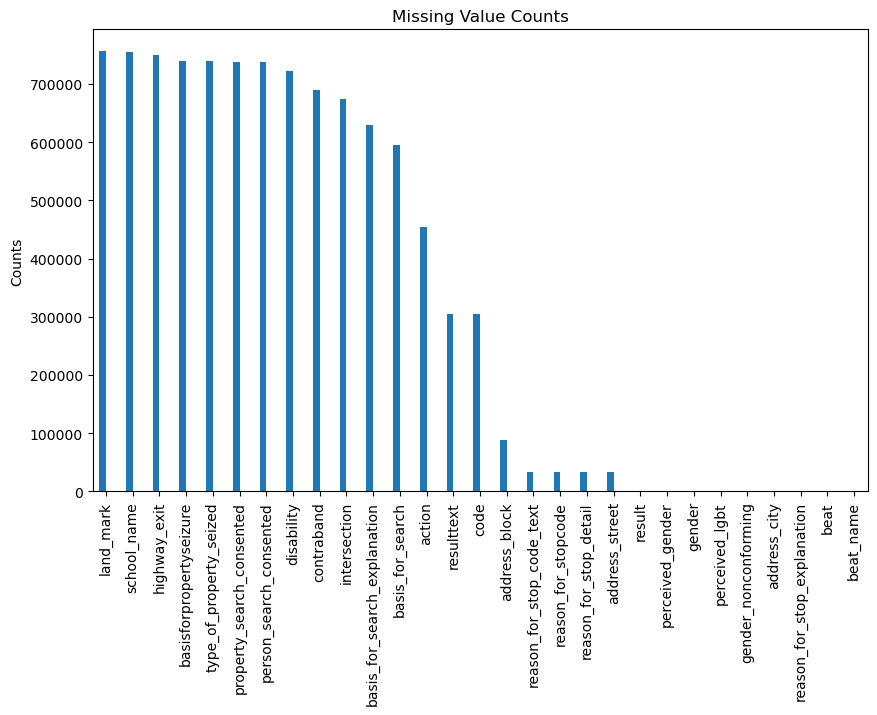

In [14]:
# Plot missing values
missing[missing['count'] > 0].sort_values(by='%', ascending=False).plot(
    kind='bar', figsize=(10, 6), legend=False, title='Missing Value Counts')
plt.ylabel('Counts')
plt.show()

In [15]:
# Columns to drop based on high nulls and lack of relevance
cols_to_drop = [
    'land_mark', 'school_name', 'highway_exit'
]

# Drop the columns
main_df = main_df.drop(columns=cols_to_drop, errors='ignore')

# Confirm remaining columns
main_df.columns

Index(['uid', 'stop_id', 'ori', 'agency', 'exp_years', 'date_stop',
       'time_stop', 'stopduration', 'stop_in_response_to_cfs',
       'officer_assignment_key', 'assignment', 'intersection', 'address_block',
       'address_street', 'isschool', 'address_city', 'beat', 'beat_name',
       'pid', 'isstudent', 'perceived_limited_english', 'perceived_age',
       'perceived_gender', 'gender_nonconforming', 'perceived_lgbt', 'action',
       'person_search_consented', 'property_search_consented', 'contraband',
       'disability', 'gender', 'basisforpropertyseizure',
       'type_of_property_seized', 'race', 'basis_for_search',
       'basis_for_search_explanation', 'reason_for_stop',
       'reason_for_stopcode', 'reason_for_stop_code_text',
       'reason_for_stop_detail', 'reason_for_stop_explanation', 'resultkey',
       'result', 'code', 'resulttext'],
      dtype='object')

### Cleaning and Standardizing Categorical Data
- Standardized categorical columns (e.g., `race`, `gender`, `action`) to ensure consistency in values.
- Mapped inconsistent or redundant values to a common format (e.g., "Hispanic/Latino/a" → "Hispanic/Latino").
- Replaced irrelevant values like "No Action" with `NaN` for better interpretability.

In [17]:
# List of relevant categorical variables
relevant_categorical_cols = [
    'reason_for_stop',
    'result',
    'race',
    'gender',
    'disability',
    'basis_for_search',
    'type_of_property_seized',
    'contraband',
    'basisforpropertyseizure',
    'assignment',
    'action'
]

# Iterate through relevant variables to analyze value counts
for col in relevant_categorical_cols:
    print(f"Value counts for {col}:")
    print(main_df[col].value_counts(dropna=False))  
    print("\n")

Value counts for reason_for_stop:
reason_for_stop
Reasonable Suspicion                                                                                                 368278
Traffic Violation                                                                                                    353840
Investigation to determine whether the person was truant                                                               9668
Knowledge of outstanding arrest warrant/wanted person                                                                  8481
Known to be on Parole / Probation / PRCS / Mandatory Supervision                                                       8188
Consensual Encounter resulting in a search                                                                             7390
Determine whether the student violated school policy                                                                     36
Possible conduct warranting discipline under Education Code sections 48900, 48900.

In [18]:
# Standardize categorical columns with case and whitespace inconsistencies
def clean_text(text):
    if isinstance(text, str):
        return text.strip().lower()  # Remove whitespace and convert to lowercase
    return text

# List of relevant columns to clean
text_columns = [
    'reason_for_stop', 'result', 'race', 'gender', 
    'disability', 'basis_for_search', 'type_of_property_seized', 
    'contraband', 'basisforpropertyseizure', 'assignment', 'action'
]

# Apply cleaning to each column
for col in text_columns:
    if col in main_df.columns:
        main_df[col] = main_df[col].apply(clean_text)

# Manual mapping to fix known inconsistencies
value_mappings = {
    'race': {
        'hispanic/latino/a': 'hispanic/latino',
        'hispanic/latino(a)': 'hispanic/latino',
        'hispanic/latine(x)': 'hispanic/latino',
    },
    'gender': {
        'transgender female': 'transgender woman/girl',
        'transgender male': 'transgender man/boy',
        'cisgender man/boy': 'male',
    },
    'contraband': {
        'drug paraphernalia': 'drug paraphernalia',
        'other contraband or evidence': 'other contraband',
        'suspected stolen property': 'suspected stolen property',
    },
    # Add similar mappings for other columns as needed
}

# Apply the mappings to the dataframe
for col, mappings in value_mappings.items():
    if col in main_df.columns:
        main_df[col] = main_df[col].replace(mappings)

# Replace "no action" with NaN in the 'action' column
if 'result' in main_df.columns:
    main_df['result'] = main_df['result'].replace('no action', np.nan)

# Display the cleaned value counts for validation
for col in text_columns:
    print(f"Cleaned value counts for {col}:")
    print(main_df[col].value_counts(dropna=False))
    print("\n")

Cleaned value counts for reason_for_stop:
reason_for_stop
reasonable suspicion                                                                                                 368278
traffic violation                                                                                                    353840
investigation to determine whether the person was truant                                                               9668
knowledge of outstanding arrest warrant/wanted person                                                                  8481
known to be on parole / probation / prcs / mandatory supervision                                                       8188
consensual encounter resulting in a search                                                                             7390
determine whether the student violated school policy                                                                     36
possible conduct warranting discipline under education code sections 48900

In [19]:
# List of relevant numeric variables
relevant_numeric_cols = [
    'stopduration', 
    'exp_years',  
    'perceived_age', 
]

main_df[relevant_numeric_cols].describe()

,stopduration,exp_years,perceived_age
count,755891.000000,755891.000000,755891.000000
mean,28.505536,6.131006,37.010888
std,50.097542,7.110663,13.379907
min,1.000000,1.000000,1.000000
25%,10.000000,1.000000,25.000000
50%,15.000000,3.000000,35.000000
75%,30.000000,10.000000,45.000000
max,1440.000000,50.000000,120.000000


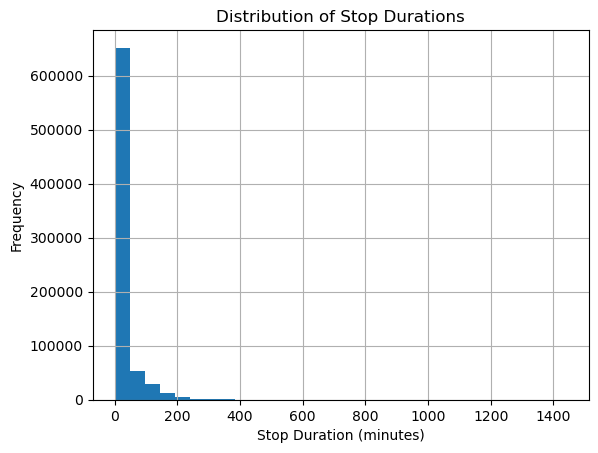

In [20]:
# Plot histogram of stop durations
main_df['stopduration'].hist(bins=30)
plt.xlabel('Stop Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Stop Durations')
plt.show()

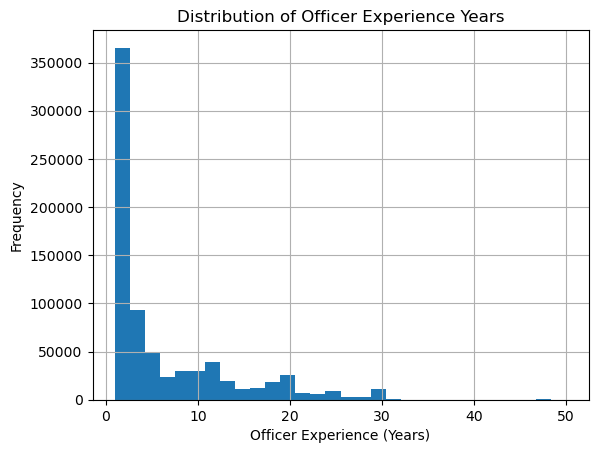

In [21]:
# Plot histogram of stop durations
main_df['exp_years'].hist(bins=30)
plt.xlabel('Officer Experience (Years)')
plt.ylabel('Frequency')
plt.title('Distribution of Officer Experience Years')
plt.show()

In [22]:
# Save the cleaned dataframe to a new CSV file
output_file = os.path.join(csv_directory, "cleaned_ripa_dataset.csv")
main_df.to_csv(output_file, index=False)

print(f"Cleaned dataset saved to: {output_file}")

Cleaned dataset saved to: C:/Users/harry/Springboard/Capstone 2/data\cleaned_ripa_dataset.csv
